In [1]:
import cv2
import matplotlib.pyplot as plt

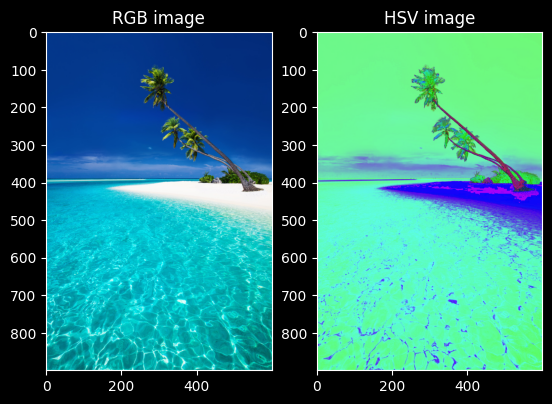

In [2]:
img = cv2.imread(r"class_notes\Day-1\data\beach-blue.jpg")
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)


plt.subplot(1, 2, 1)
plt.imshow(rgb_img)
plt.title("RGB image")

plt.subplot(1, 2, 2)
plt.imshow(hsv_img)
plt.title("HSV image")

plt.show()


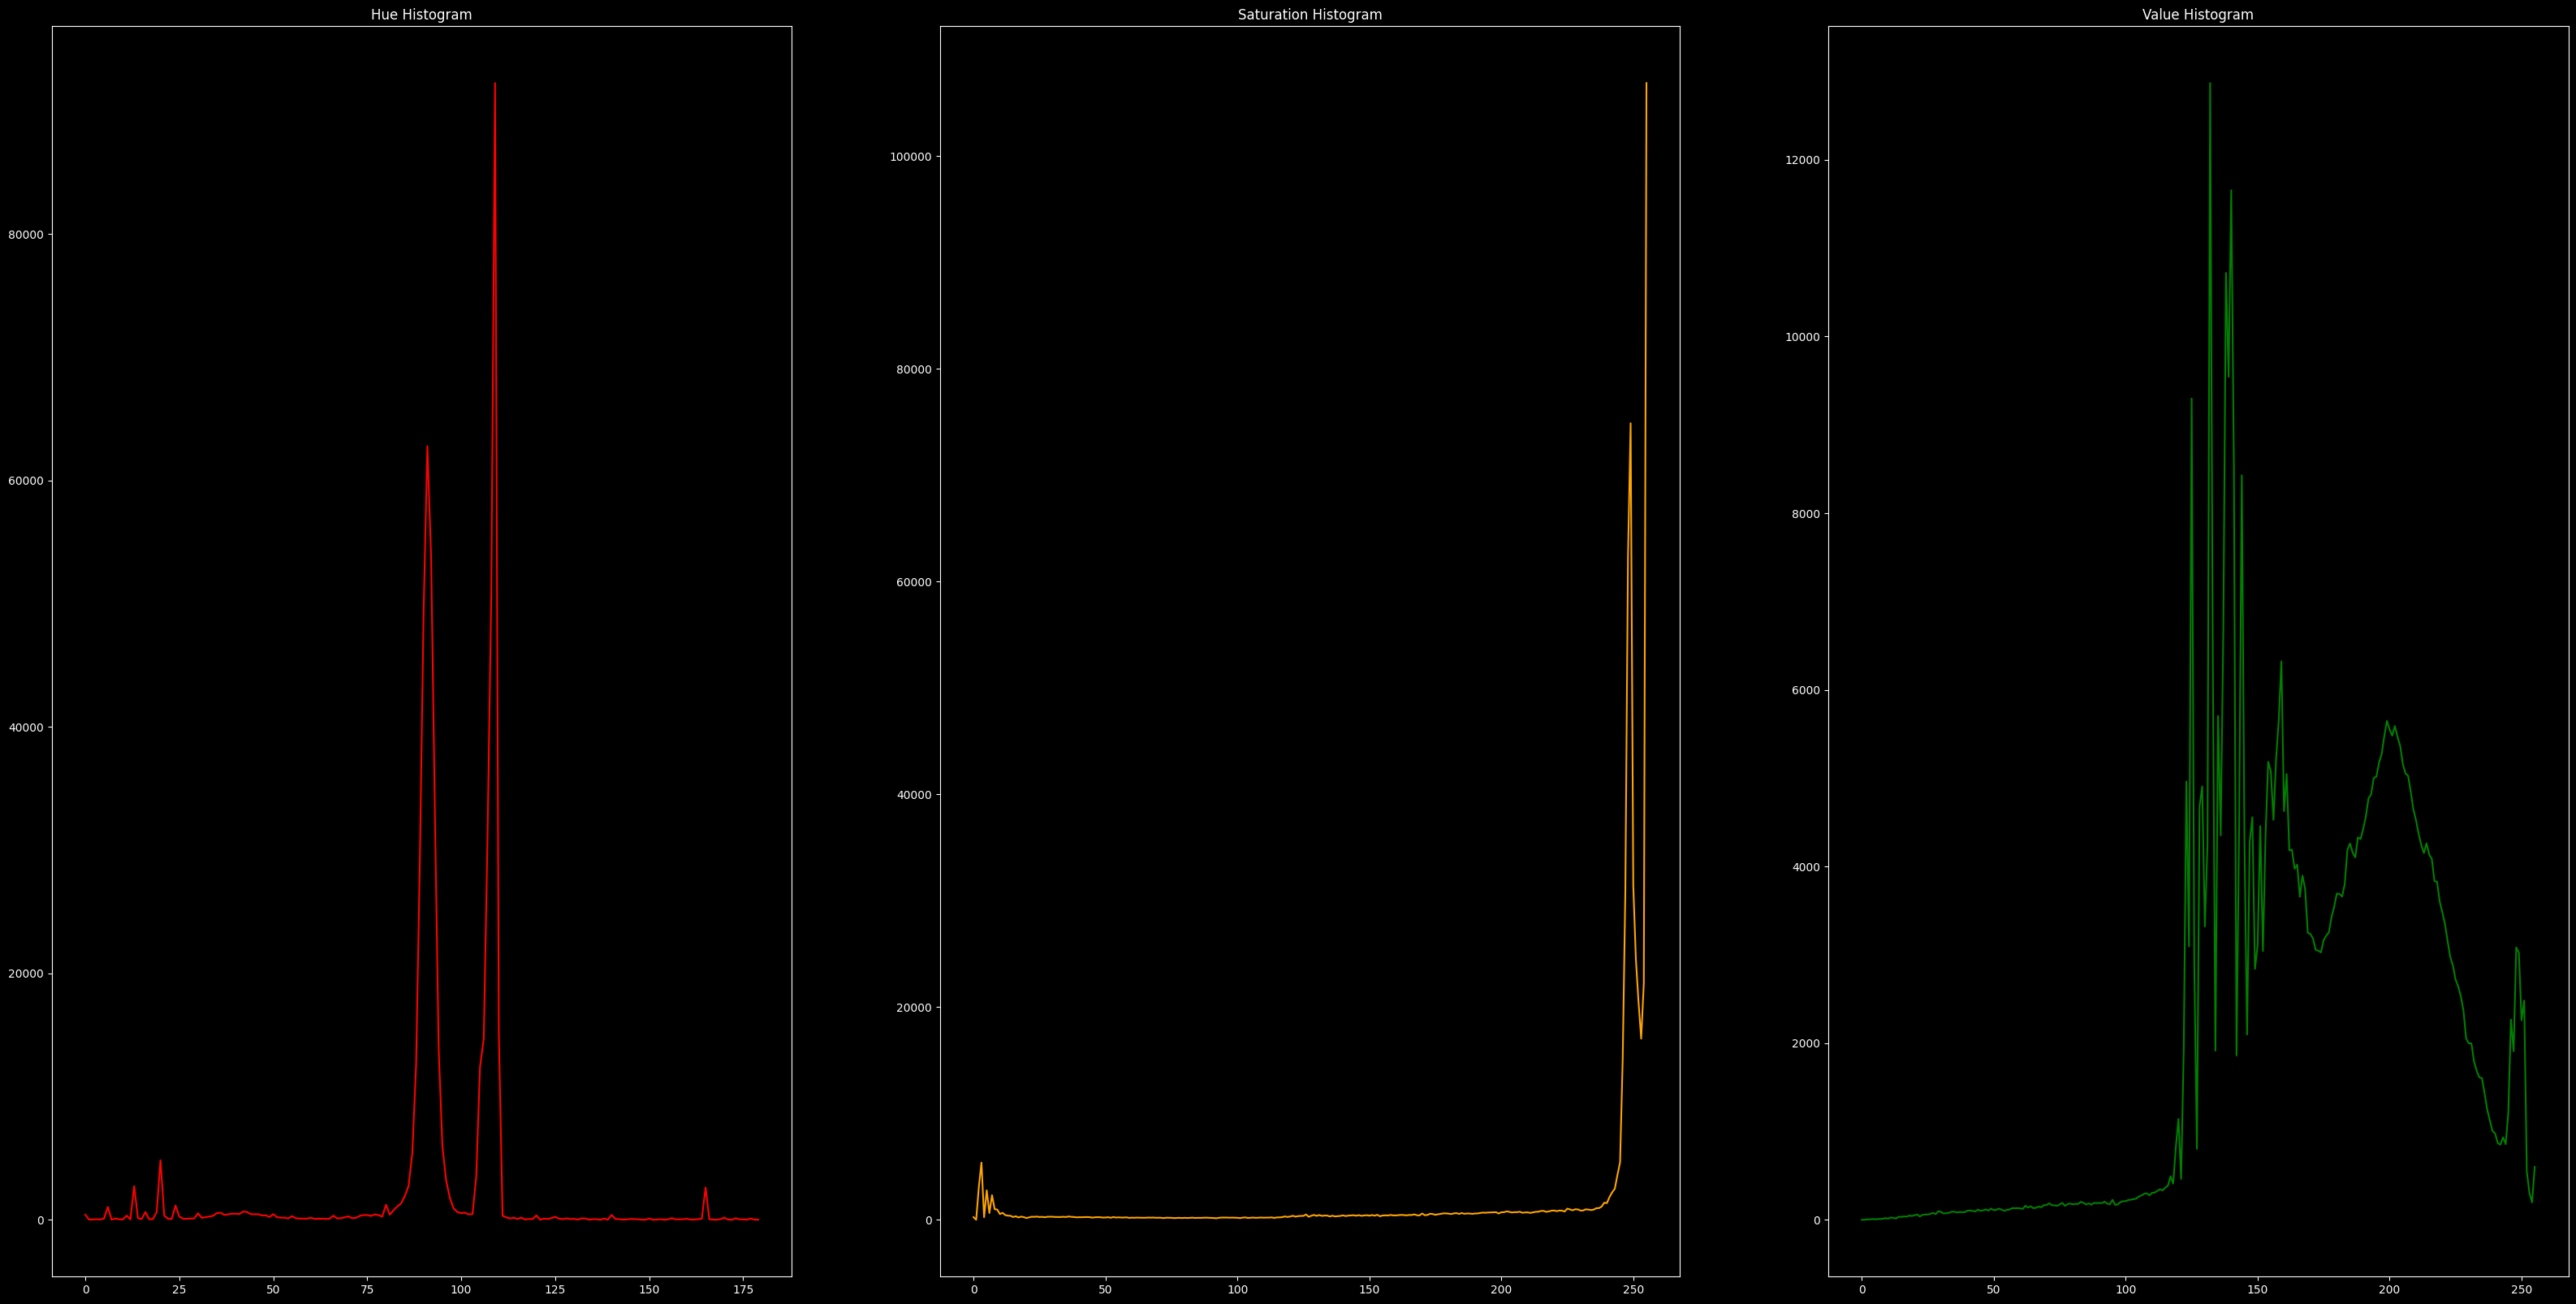

In [8]:
import matplotlib.pyplot as plt
import numpy as np

hue_hist = cv2.calcHist([hsv_img], [0], None, [180], [0, 180])
saturation_hist = cv2.calcHist([hsv_img], [1], None, [256], [0, 256])
value_hist = cv2.calcHist([hsv_img], [2], None, [256], [0, 256])

plt.figure(figsize=(40,20))

plt.subplot(1,3,1)
plt.plot(np.arange(180), hue_hist[:, 0], color="r")
plt.title("Hue Histogram")

plt.subplot(1,3,2)
plt.plot(np.arange(256), saturation_hist[:, 0], color="orange")
plt.title("Saturation Histogram")

plt.subplot(1,3,3)
plt.plot(np.arange(256), value_hist[:, 0], color="green")
plt.title("Value Histogram")

plt.show()


In [ ]:
import cv2
import numpy as np

def predict_image_is_warm(image_path):
    img = cv2.imread(image_path)
    hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    hue = hsv_img[:, :, 0]
    
    print(np.max(hue), np.min(hue))

    warm_mask = (hue <= 60)
    cool_mask = (hue >= 90)

    warm_percentage = np.sum(warm_mask) / np.size(hue) * 100
    cool_percentage = np.sum(cool_mask) / np.size(hue) * 100
 
    if warm_percentage > cool_percentage:
        print("Image is Warm")
    else:
        print("Image is Cool")

    print(f"Warm Percentage : {round(warm_percentage, 2)}%")
    print(f"Cool Percentage : {round(cool_percentage, 2)}%")


predict_image_is_warm(r"D:\Learning\CV\Krishnaik_live\class_notes\Day-1\data\beach-blue_orient.jpg")

179 0
Image is Cool
Warm Percentage : 4.25%
Cool Percentage : 85.37%


In [43]:
def predict_dull_vs_bright(image_path):
    img = cv2.imread(image_path)
    hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    saturation = hsv_img[:, :, 1]
    value = hsv_img[:, :, 2]

    saturation_threshold = 130
    value_threshold = 120
    dull_threshold = 50

    dull_mask = (saturation < saturation_threshold) & (value < value_threshold)

    dull_percentage = np.sum(dull_mask) / np.size(saturation) * 100
    
    print(f"Dull percentage: {dull_percentage:.2f}%")

    if dull_percentage > dull_threshold:
        print("image is Dull")
    else:
        print("image is bright")

predict_dull_vs_bright(r"D:\Learning\CV\Krishnaik_live\class_notes\Day-1\data\PXL_20241002_015409987.NIGHT.jpg")

    

Dull percentage: 45.92%
image is bright


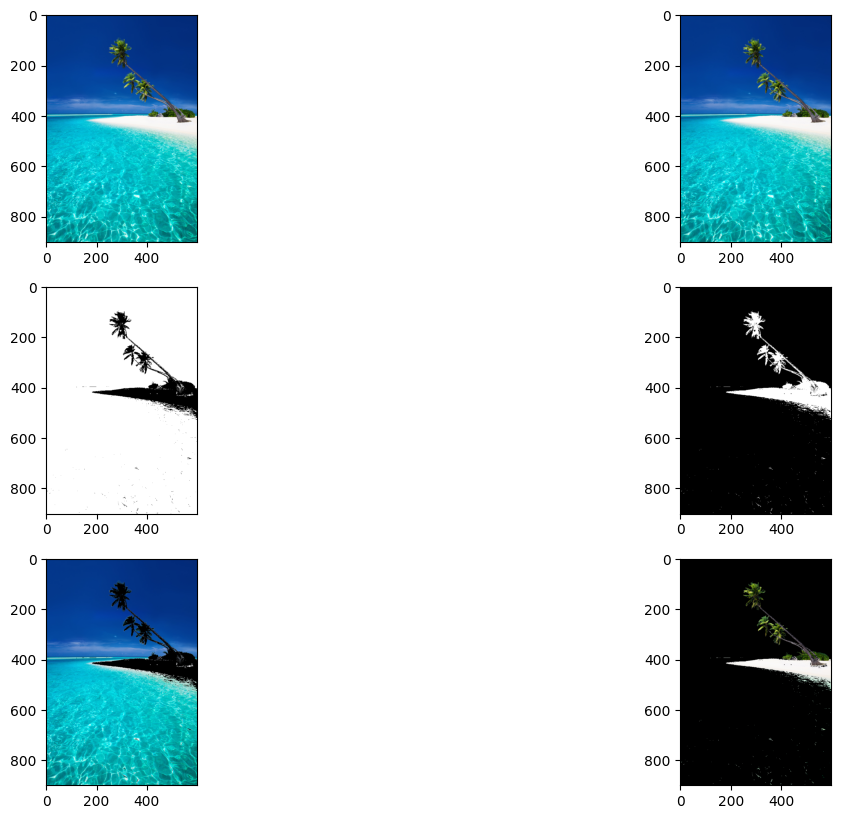

In [86]:
import matplotlib.pyplot as plt
import cv2
image_path = r"D:\Learning\CV\Krishnaik_live\class_notes\Day-1\data\beach-blue.jpg"
img = cv2.imread(image_path)

hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

blue_upper_range = (120, 255, 255)
blue_lower_range = (80, 0, 50)

mask = cv2.inRange(hsv_img, blue_lower_range, blue_upper_range)
mask_inv = cv2.bitwise_not(mask)

blue_img = cv2.bitwise_and(rgb_img, rgb_img, mask=mask)
land_img = cv2.bitwise_and(rgb_img, rgb_img, mask=mask_inv)

plt.figure(figsize=(15, 10))
# plt.subplot(1,2,1)
# plt.imshow(mask, cmap="gray")
# plt.grid(False)

# plt.subplot(1,2,2)
# plt.imshow(mask_inv, cmap="gray")
# plt.grid(False)

plt.subplot(3,2,1)
plt.imshow(rgb_img)
plt.grid(False)

plt.subplot(3,2,2)
plt.imshow(rgb_img)
plt.grid(False)

plt.subplot(3,2,3)
plt.imshow(mask, cmap="gray")
plt.grid(False)

plt.subplot(3,2,4)
plt.imshow(mask_inv, cmap="gray")
plt.grid(False)

plt.subplot(3,2,5)
plt.imshow(blue_img)
plt.grid(False)

plt.subplot(3,2,6)
plt.imshow(land_img)
plt.grid(False)



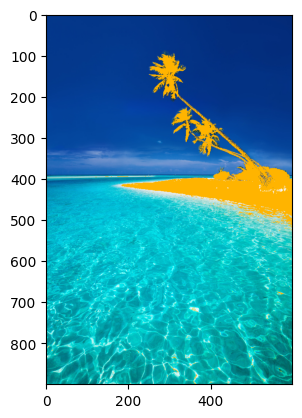

In [85]:
import numpy as np
orange_img = np.zeros_like(rgb_img)
orange_img[:] = (255, 180, 0)

land_orange_img = cv2.bitwise_and(orange_img, orange_img, mask=mask_inv)
blue_orange_img = cv2.add(blue_img, land_orange_img)
plt.imshow(blue_orange_img)



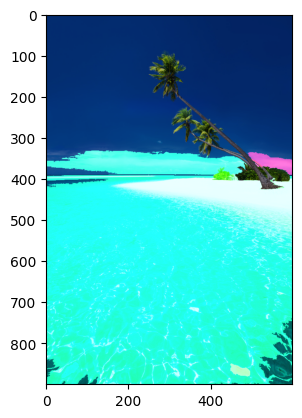

In [73]:
## Contour
import cv2
import numpy as np
base_img = rgb_img

img_gray = cv2.cvtColor(base_img, cv2.COLOR_BGR2GRAY)
zero_img = np.zeros_like(base_img)

_, thresh = cv2.threshold(img_gray, 120, 180, cv2.THRESH_BINARY)
contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Find top 5 contours by Contour area
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:5]

for contour in contours:
    color = (np.random.randint(0,255), np.random.randint(0,255), np.random.randint(0,255))
    cv2.drawContours(zero_img, [contour], -1, color, thickness=cv2.FILLED)

# plt.imshow(zero_img)

final_result = cv2.addWeighted(base_img, 0.8, zero_img, 0.8, 0.2)

plt.imshow(final_result)



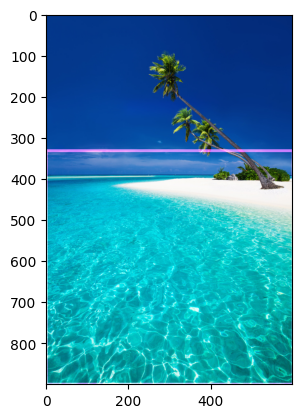

In [83]:
## Bounding boxes

img_gray = cv2.cvtColor(base_img, cv2.COLOR_BGR2GRAY)
zero_img = np.zeros_like(base_img)

_, thresh = cv2.threshold(img_gray, 120, 180, cv2.THRESH_BINARY)
contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Select top 1 contour
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:1]

for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    color = (np.random.randint(0, 255), np.random.randint(0, 255), np.random.randint(0, 255))
    cv2.rectangle(zero_img, (x,y), (x+w, y+h), color, 5)



final_result = cv2.addWeighted(base_img, 1, zero_img, 1, 0.2)

plt.imshow(final_result)

In [87]:
zero_img.shape

(900, 600, 3)